#**Note**
This is our ***1st*** notebook. Here is our how notebooks are divided:
1. (we are here) **Nadeen_Ali_Bioinfo_Preprocessing.ipynb**
2. **Nadeen_Ali_Bioinfo_MOFA_Object.ipynb**
3. **Nadeen_Ali_Bioinfo_Data_Integration.ipynb**

#**1 - Dataset Selection**
[**data source**](https://linkedomics.org/data_download/TCGA-STAD/)

#**Reading Data**

In [1]:
import pandas as pd
import gzip

In [2]:
# paths for the files
rna_file = '/content/TCGA_STAD_RNAseq.cct.gz'
mutation_file = '/content/TCGA_STAD_Mutation.cbt.gz'
clinical_file = '/content/TCGA_STAD_Clinical.tsi'

In [3]:
# RNAseq file
with gzip.open(rna_file, 'rt') as f:
    rna_df = pd.read_csv(f, sep = '\t', low_memory = False)
rna_df

,attrib_name,TCGA.3M.AB46,TCGA.3M.AB47,TCGA.B7.5816,TCGA.B7.5818,TCGA.B7.A5TI,TCGA.B7.A5TJ,TCGA.B7.A5TK,TCGA.B7.A5TN,TCGA.BR.4187,...,TCGA.VQ.AA6A,TCGA.VQ.AA6B,TCGA.VQ.AA6D,TCGA.VQ.AA6F,TCGA.VQ.AA6G,TCGA.VQ.AA6I,TCGA.VQ.AA6J,TCGA.VQ.AA6K,TCGA.ZA.A8F6,TCGA.ZQ.A9CR
0,A1BG,5.5081,5.7387,4.2505,4.2236,4.8160,4.6991,5.9088,5.1246,4.1711,...,3.9441,4.6257,5.6084,5.3010,3.6607,5.7058,5.9863,5.2020,5.5316,6.6503
1,A1CF,3.0197,6.7376,0.5029,0.0000,7.1520,8.4519,2.6863,4.2588,7.6664,...,4.1996,8.2185,6.9650,4.8233,9.3392,0.3109,6.4501,6.0293,7.5721,5.8500
2,A2BP1,0.5597,4.0805,0.0000,0.0000,0.0000,1.3192,0.0000,0.0000,0.4907,...,0.4025,0.3764,0.0000,1.1828,0.0000,0.0000,0.0000,0.7712,0.0000,0.5996
3,A2LD1,8.1526,7.6197,7.3991,4.5691,7.7915,9.6335,5.8017,7.4003,7.1061,...,7.2887,6.5023,8.2440,7.4065,7.4722,6.1155,7.5541,7.1268,6.9847,6.0087
4,A2ML1,0.0000,0.8610,1.4159,5.7385,5.1314,0.4582,0.0000,5.8553,2.9034,...,3.1247,0.3764,0.0000,0.0000,0.9786,0.3109,0.7810,3.0121,0.8376,0.5996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20220,ZYX,11.9886,12.4904,12.5291,12.8722,12.2187,12.7090,13.2000,12.9409,12.8545,...,12.4052,12.7353,11.3169,12.3484,12.0428,11.9687,12.2275,12.1412,13.3292,12.6493
20221,ZZEF1,9.7748,10.7432,10.5634,9.8130,10.4164,10.6859,9.8060,10.1034,10.6923,...,12.2310,10.4648,10.0481,10.7315,11.7562,10.8962,10.6662,11.1009,11.4477,9.9037
20222,ZZZ3,9.6721,9.7870,8.9397,8.4048,9.5660,9.2658,9.2687,9.2021,9.6661,...,9.8634,9.5673,10.1752,9.9122,9.7541,9.4926,10.0931,9.0971,9.5642,9.4738
20223,psiTPTE22,4.4500,3.6356,5.6012,4.1187,4.9425,3.4222,5.2468,5.6933,6.8434,...,3.4977,3.8493,3.8100,2.8780,3.1317,5.2494,4.9283,3.7407,7.1244,4.1283


In [4]:
# mutaion file
with gzip.open(mutation_file, 'rt') as f:
    mut_df = pd.read_csv(f, sep = '\t', low_memory = False)
mut_df

,attrib_name,TCGA.CG.5721,TCGA.D7.A74A,TCGA.IN.A6RR,TCGA.BR.6452,TCGA.BR.8289,TCGA.CD.5800,TCGA.CD.A4MJ,TCGA.CG.4301,TCGA.F1.6177,...,TCGA.CG.5716,TCGA.CG.4462,TCGA.FP.8209,TCGA.RD.A8N4,TCGA.BR.8371,TCGA.BR.A4IV,TCGA.FP.8210,TCGA.RD.A8N0,TCGA.HU.A4GJ,TCGA.RD.A8N2
0,A1BG,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,A1CF,0,0,0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,A2BP1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,A2M,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,A2ML1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13719,ZXDC,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13720,ZYG11B,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13721,ZYX,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13722,ZZEF1,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# clinical data file
clin_df = pd.read_csv(clinical_file, sep = '\t')
clin_df

,attrib_name,TCGA.CG.4444,TCGA.CG.4460,TCGA.CG.4475,TCGA.CG.4476,TCGA.CG.5716,TCGA.CG.5727,TCGA.EQ.A4SO,TCGA.F1.6177,TCGA.FP.A8CX,...,TCGA.VQ.AA6A,TCGA.VQ.AA6B,TCGA.VQ.AA6D,TCGA.VQ.AA6F,TCGA.VQ.AA6G,TCGA.VQ.AA6I,TCGA.VQ.AA6J,TCGA.VQ.AA6K,TCGA.ZA.A8F6,TCGA.ZQ.A9CR
0,years_to_birth,76,66,76,69,86,66,70,90,60,...,56,48,52,57,68,68,75,59,71,79
1,pathologic_stage,stageiii,stageiv,stageii,stageiii,stageiv,stageii,stageiii,stagei,stageiii,...,stageiii,stageiii,stageiii,stageii,stageii,stageiii,stageiii,stageiii,stagei,stageiii
2,pathology_T_stage,t2,t4,t3,t4,t4,t3,t4,t1,t4,...,t4,t3,t4,t3,t3,t3,t4,t4,t2,t4
3,pathology_N_stage,n2,n1,n1,n3,n2,n0,n1,n1,n3,...,n3,n2,n1,n1,n0,n3,n2,n3,n0,n3
4,pathology_M_stage,m0,m1,m0,m0,m1,m0,NaN,NaN,NaN,...,m0,m0,m0,m0,m0,m0,m0,m0,NaN,NaN
5,histological_type,"stomach,adenocarcinoma,diffusetype","stomach,intestinaladenocarcinoma,nototherwises...",NaN,"stomach,adenocarcinoma,diffusetype","stomach,adenocarcinoma,nototherwisespecified(nos)","stomach,intestinaladenocarcinoma,nototherwises...",NaN,"stomach,adenocarcinoma,nototherwisespecified(nos)","stomachadenocarcinoma,signetringtype",...,"stomach,intestinaladenocarcinoma,nototherwises...","stomach,intestinaladenocarcinoma,nototherwises...","stomach,intestinaladenocarcinoma,tubulartype","stomach,intestinaladenocarcinoma,nototherwises...","stomach,intestinaladenocarcinoma,nototherwises...","stomach,intestinaladenocarcinoma,nototherwises...","stomach,intestinaladenocarcinoma,nototherwises...","stomachadenocarcinoma,signetringtype","stomach,intestinaladenocarcinoma,nototherwises...","stomach,intestinaladenocarcinoma,tubulartype"
6,number_of_lymph_nodes,15,2,2,12,NaN,0,1,2,15,...,8,5,2,1,0,9,3,10,0,9
7,gender,male,female,male,male,male,male,male,male,male,...,male,male,female,male,male,male,male,male,male,female
8,radiation_therapy,yes,no,no,NaN,NaN,no,yes,no,NaN,...,yes,yes,yes,yes,no,no,no,yes,no,no
9,residual_tumor,r0,r2,r0,r0,r2,r0,r0,r0,r0,...,r0,r0,r0,r0,r0,r0,r0,r1,r0,r0


#**2 - Data Preprocessing & Quality Control**

#**Fixing Rows & Cols**

In [6]:
# renaming 'attrib_name' to 'genes'
rna_df.rename(columns = {'attrib_name': 'gene'}, inplace = True)
rna_df.set_index('gene', inplace = True)
rna_df = rna_df.T
  # keep in mind that 'samples' = rows, 'genes' = cols
rna_df.index.name = 'sample_id'

rna_df.head()

gene,A1BG,A1CF,A2BP1,A2LD1,A2ML1,A2M,A4GALT,A4GNT,AAA1,AAAS,...,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,psiTPTE22,tAKR
sample_id,,,,,,,,,,,,,,,,,,,,,
TCGA.3M.AB46,5.5081,3.0197,0.5597,8.1526,0.0000,12.6794,6.7817,0.0000,3.9279,9.6244,...,4.9698,8.6596,9.5893,3.8823,10.1793,11.9886,9.7748,9.6721,4.4500,0.962
TCGA.3M.AB47,5.7387,6.7376,4.0805,7.6197,0.8610,14.6877,8.4827,1.6045,0.4939,9.3214,...,4.8457,9.3959,9.7464,1.6045,10.0667,12.4904,10.7432,9.7870,3.6356,0.861
TCGA.B7.5816,4.2505,0.5029,0.0000,7.3991,1.4159,13.1105,9.2623,5.7651,2.1165,9.2730,...,5.9516,8.3146,9.5556,0.0000,9.3951,12.5291,10.5634,8.9397,5.6012,0.000
TCGA.B7.5818,4.2236,0.0000,0.0000,4.5691,5.7385,12.1513,7.2994,10.3271,0.7267,9.5599,...,3.3460,5.0483,10.6552,0.0000,8.9939,12.8722,9.8130,8.4048,4.1187,0.000
TCGA.B7.A5TI,4.8160,7.1520,0.0000,7.7915,5.1314,14.0724,7.8367,9.2853,2.8264,9.6064,...,4.3473,8.2006,9.8816,1.0533,9.3485,12.2187,10.4164,9.5660,4.9425,0.000


In [7]:
mut_df.rename(columns = {'attrib_name': 'gene'}, inplace = True)
mut_df.set_index('gene', inplace = True)
mut_df = mut_df.T
mut_df.index.name = 'sample_id'

mut_df.head()

gene,A1BG,A1CF,A2BP1,A2M,A2ML1,A4GALT,AAAS,AACS,AADAC,AADACL2,...,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11B,ZYX,ZZEF1,ZZZ3
sample_id,,,,,,,,,,,,,,,,,,,,,
TCGA.CG.5721,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
TCGA.D7.A74A,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA.IN.A6RR,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA.BR.6452,0,1,0,1,1,1,0,1,1,1,...,0,0,1,1,0,0,1,0,1,0
TCGA.BR.8289,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
clin_df.rename(columns = {'attrib_name': 'clinical_data'}, inplace = True)
clin_df.set_index('clinical_data', inplace = True)
clin_df = clin_df.T
clin_df.index.name = 'sample_id'
clin_df = clin_df.drop('overallsurvival', axis = 1)

clin_df.head()

clinical_data,years_to_birth,pathologic_stage,pathology_T_stage,pathology_N_stage,pathology_M_stage,histological_type,number_of_lymph_nodes,gender,radiation_therapy,residual_tumor,race,ethnicity,overall_survival,status
sample_id,,,,,,,,,,,,,,
TCGA.CG.4444,76,stageiii,t2,n2,m0,"stomach,adenocarcinoma,diffusetype",15,male,yes,r0,NaN,NaN,1431,0
TCGA.CG.4460,66,stageiv,t4,n1,m1,"stomach,intestinaladenocarcinoma,nototherwises...",2,female,no,r2,NaN,NaN,669,1
TCGA.CG.4475,76,stageii,t3,n1,m0,NaN,2,male,no,r0,NaN,NaN,699,0
TCGA.CG.4476,69,stageiii,t4,n3,m0,"stomach,adenocarcinoma,diffusetype",12,male,NaN,r0,NaN,NaN,NaN,NaN
TCGA.CG.5716,86,stageiv,t4,n2,m1,"stomach,adenocarcinoma,nototherwisespecified(nos)",NaN,male,NaN,r2,NaN,NaN,NaN,NaN


#**Removing Missing Values**

In [9]:
rna_df.isnull().sum().sum()

0

In [10]:
rna_df

gene,A1BG,A1CF,A2BP1,A2LD1,A2ML1,A2M,A4GALT,A4GNT,AAA1,AAAS,...,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,psiTPTE22,tAKR
sample_id,,,,,,,,,,,,,,,,,,,,,
TCGA.3M.AB46,5.5081,3.0197,0.5597,8.1526,0.0000,12.6794,6.7817,0.0000,3.9279,9.6244,...,4.9698,8.6596,9.5893,3.8823,10.1793,11.9886,9.7748,9.6721,4.4500,0.9620
TCGA.3M.AB47,5.7387,6.7376,4.0805,7.6197,0.8610,14.6877,8.4827,1.6045,0.4939,9.3214,...,4.8457,9.3959,9.7464,1.6045,10.0667,12.4904,10.7432,9.7870,3.6356,0.8610
TCGA.B7.5816,4.2505,0.5029,0.0000,7.3991,1.4159,13.1105,9.2623,5.7651,2.1165,9.2730,...,5.9516,8.3146,9.5556,0.0000,9.3951,12.5291,10.5634,8.9397,5.6012,0.0000
TCGA.B7.5818,4.2236,0.0000,0.0000,4.5691,5.7385,12.1513,7.2994,10.3271,0.7267,9.5599,...,3.3460,5.0483,10.6552,0.0000,8.9939,12.8722,9.8130,8.4048,4.1187,0.0000
TCGA.B7.A5TI,4.8160,7.1520,0.0000,7.7915,5.1314,14.0724,7.8367,9.2853,2.8264,9.6064,...,4.3473,8.2006,9.8816,1.0533,9.3485,12.2187,10.4164,9.5660,4.9425,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA.VQ.AA6I,5.7058,0.3109,0.0000,6.1155,0.3109,13.2017,6.4206,6.3669,1.1392,9.2594,...,6.7359,9.4873,10.0127,0.9724,9.9319,11.9687,10.8962,9.4926,5.2494,0.5666
TCGA.VQ.AA6J,5.9863,6.4501,0.0000,7.5541,0.7810,13.6318,7.2072,4.6266,0.0000,9.4326,...,6.3221,9.0092,10.0763,2.4722,9.3755,12.2275,10.6662,10.0931,4.9283,0.7810
TCGA.VQ.AA6K,5.2020,6.0293,0.7712,7.1268,3.0121,14.5409,8.3538,4.2761,1.4682,8.9492,...,6.0829,8.9073,10.7489,2.0636,9.5428,12.1412,11.1009,9.0971,3.7407,1.0427


In [11]:
mut_df.isnull().sum().sum()

0

In [12]:
mut_df

gene,A1BG,A1CF,A2BP1,A2M,A2ML1,A4GALT,AAAS,AACS,AADAC,AADACL2,...,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11B,ZYX,ZZEF1,ZZZ3
sample_id,,,,,,,,,,,,,,,,,,,,,
TCGA.CG.5721,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
TCGA.D7.A74A,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA.IN.A6RR,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA.BR.6452,0,1,0,1,1,1,0,1,1,1,...,0,0,1,1,0,0,1,0,1,0
TCGA.BR.8289,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA.BR.A4IV,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA.FP.8210,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA.RD.A8N0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
clin_df.isnull().sum().sum()

505

In [14]:
clin_df = clin_df.dropna()
clin_df.isnull().sum().sum()

0

In [15]:
clin_df

clinical_data,years_to_birth,pathologic_stage,pathology_T_stage,pathology_N_stage,pathology_M_stage,histological_type,number_of_lymph_nodes,gender,radiation_therapy,residual_tumor,race,ethnicity,overall_survival,status
sample_id,,,,,,,,,,,,,,
TCGA.MX.A663,66,stageii,t3,n0,m0,"stomach,adenocarcinoma,nototherwisespecified(nos)",0,male,no,r0,white,nothispanicorlatino,300,1
TCGA.B7.5816,51,stageii,t4,n0,m0,"stomach,adenocarcinoma,diffusetype",0,female,no,r0,white,nothispanicorlatino,812,0
TCGA.BR.6452,78,stageii,t3,n0,m0,"stomach,adenocarcinoma,nototherwisespecified(nos)",0,female,no,r0,white,nothispanicorlatino,1055,0
TCGA.BR.6453,54,stageii,t2,n1,m0,"stomach,adenocarcinoma,nototherwisespecified(nos)",1,male,no,r0,white,nothispanicorlatino,485,0
TCGA.BR.6455,59,stageii,t3,n1,m0,"stomach,adenocarcinoma,nototherwisespecified(nos)",2,male,no,r0,white,nothispanicorlatino,422,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA.RD.A8N6,78,stageiii,t2,n2,m0,"stomach,intestinaladenocarcinoma,nototherwises...",10,female,no,r0,white,nothispanicorlatino,272,1
TCGA.RD.A8N9,63,stageii,t2,n1,m0,"stomach,adenocarcinoma,diffusetype",2,female,yes,r0,asian,nothispanicorlatino,1083,0
TCGA.RD.A8NB,80,stageiii,t3,n1,m0,"stomach,adenocarcinoma,diffusetype",3,female,no,r1,white,nothispanicorlatino,513,1


#**Low Quality Data**

In [16]:
# genes must be expressed in AT LEAST 20% of samples
print(f'rna data shape before: {rna_df.shape}')

min_rna_threshold = 0.2
min_rna_samples = int(rna_df.shape[0] * min_rna_threshold)
rna_df = rna_df.loc[:, (rna_df != 0).sum(axis = 0) >= min_rna_samples]
print(f'rna data shape after: {rna_df.shape}')

rna data shape before: (415, 20225)
rna data shape after: (415, 19112)


In [17]:
# genes must be mutated in AT LEAST 5% of samples
print(f'mutation data shape before: {mut_df.shape}')

min_mutation_threshold = 0.05
min_mutation_samples = int(mut_df.shape[0] * min_mutation_threshold)
mut_df = mut_df.loc[:, (mut_df != 0).sum(axis = 0) >= min_mutation_samples]
print(f'mutation data shape after: {mut_df.shape}')

mutation data shape before: (393, 13724)
mutation data shape after: (393, 1068)


#**Finding Common Samples**

In [18]:
print(f'RNA shape: {rna_df.shape}')
print(f'Mutation shape: {mut_df.shape}')
print(f'Clinical shape: {clin_df.shape}')

RNA shape: (415, 19112)
Mutation shape: (393, 1068)
Clinical shape: (217, 14)


In [19]:
# finding common samples
common_samples = set(rna_df.index) & set(mut_df.index) & set(clin_df.index)
common_samples = list(common_samples)

print(f'Number of common samples: {len(common_samples)}')

Number of common samples: 205


In [20]:
# filtering datasets based on common samples
rna_df = rna_df.loc[common_samples]
mut_df = mut_df.loc[common_samples]
clin_df = clin_df.loc[common_samples]

# checking dimensions
print(f'Dimensions of rna_df: {rna_df.shape}')
print(f'Dimensions of mutation_df: {mut_df.shape}')
print(f'Dimensions of clinical_df: {clin_df.shape}')

Dimensions of rna_df: (205, 19112)
Dimensions of mutation_df: (205, 1068)
Dimensions of clinical_df: (205, 14)


In [21]:
print(rna_df.head(), '\n')
print(mut_df.head(), '\n')
print(clin_df.head())

gene            A1BG    A1CF   A2BP1   A2LD1    A2ML1      A2M  A4GALT  \
sample_id                                                                
TCGA.D7.6527  6.4640  1.9329  0.0000  9.1339   0.5555  14.1466  8.4317   
TCGA.D7.6822  3.8055  4.3179  0.0000  7.2900   0.4140  13.2464  9.8871   
TCGA.F1.6874  4.8549  8.3561  1.4196  7.6986   2.2537  13.9107  8.2066   
TCGA.BR.A4IY  5.9790  0.0000  0.5514  5.3903  12.3528  12.9834  8.0497   
TCGA.D7.A6EX  4.1738  7.5624  0.0000  7.4322   0.5725  11.9968  6.6837   

gene           A4GNT    AAA1     AAAS  ...    ZXDA     ZXDB     ZXDC  ZYG11A  \
sample_id                              ...                                     
TCGA.D7.6527  9.7625  0.0000  10.2051  ...  7.3324   9.7585  10.1465  3.7742   
TCGA.D7.6822  1.8714  0.0000   9.3534  ...  6.0620   9.1897  10.3192  2.2191   
TCGA.F1.6874  2.5911  5.7710   9.4065  ...  4.9020   9.4277  10.5567  3.1631   
TCGA.BR.A4IY  0.3019  0.3019   9.7987  ...  4.9115   8.8463  10.0186  0.7641   
T

#**Outlier Detection**

In [22]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

#**PCA**
notes for myself:
- PCA helps divide the data into dimensions to try and find the **most efficient** way to explain the variation in data (RNAseq in this case)
- **Dots** = samples (patients)
- **Colors** (hue) = groups, clusters based on *some other data* (clinical, mutation)

In [23]:
# scaling data before PCA (bc it's linear)
sc = StandardScaler()
rna_scaled = sc.fit_transform(rna_df)

# PCA plot
pca = PCA(n_components = 4)
rna_pca = pca.fit_transform(rna_scaled)
pca_df = pd.DataFrame(rna_pca,
                      columns = ['PC1', 'PC2', 'PC3', 'PC4'],
                      index = rna_df.index)

In [24]:
clin_df.head()

clinical_data,years_to_birth,pathologic_stage,pathology_T_stage,pathology_N_stage,pathology_M_stage,histological_type,number_of_lymph_nodes,gender,radiation_therapy,residual_tumor,race,ethnicity,overall_survival,status
sample_id,,,,,,,,,,,,,,
TCGA.D7.6527,62,stageii,t2,n1,m0,"stomach,intestinaladenocarcinoma,papillarytype",1,male,yes,r0,white,nothispanicorlatino,312,1
TCGA.D7.6822,77,stagei,t2,n0,m0,"stomach,intestinaladenocarcinoma,tubulartype",0,male,no,r0,white,nothispanicorlatino,375,0
TCGA.F1.6874,79,stagei,t2,n0,m0,"stomach,intestinaladenocarcinoma,nototherwises...",0,male,no,r0,white,nothispanicorlatino,440,0
TCGA.BR.A4IY,58,stageii,t4,n0,m0,"stomach,adenocarcinoma,nototherwisespecified(nos)",0,male,no,r0,asian,nothispanicorlatino,392,0
TCGA.D7.A6EX,72,stageiii,t3,n2,m0,"stomach,intestinaladenocarcinoma,tubulartype",4,female,no,r0,white,nothispanicorlatino,344,0


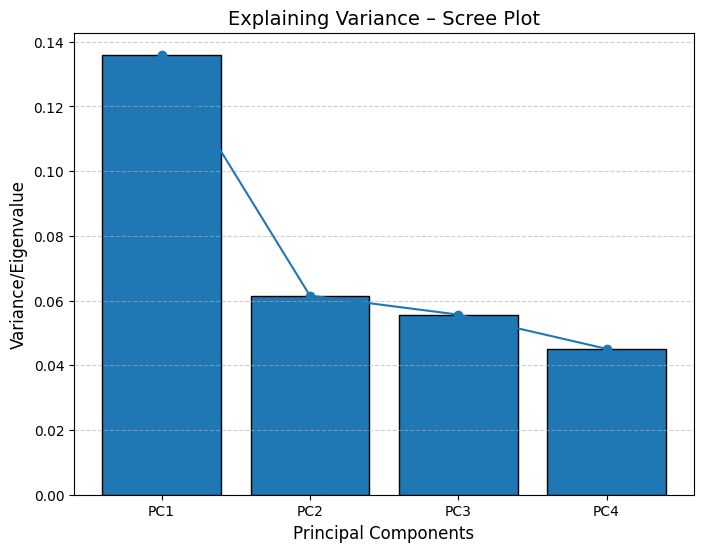

In [25]:
ratio = pca.explained_variance_ratio_

plt.figure(figsize = (8, 6))
plt.bar(range(1, len(ratio) + 1), ratio, edgecolor = 'black')
plt.plot(range(1, len(ratio) + 1), ratio, marker = 'o')
plt.xlabel('Principal Components', fontsize = 12)
plt.ylabel('Variance/Eigenvalue', fontsize = 12)
plt.title('Explaining Variance – Scree Plot', fontsize = 14)
plt.xticks(ticks = range(1, len(ratio) + 1), labels = [f'PC{i}' for i in range(1, len(ratio) + 1)], fontsize = 10)
plt.grid(axis = 'y', linestyle = '--', alpha = 0.6)

plt.show()

In [26]:
pca_df[[
    'pathologic_stage',
    'pathology_T_stage',
    'pathology_N_stage',
    'pathology_M_stage',
    'gender',
    'radiation_therapy',
    'residual_tumor',
    'race',
    'ethnicity']] = clin_df[[
        'pathologic_stage',
        'pathology_T_stage',
        'pathology_N_stage',
        'pathology_M_stage',
        'gender',
        'radiation_therapy',
        'residual_tumor',
        'race',
        'ethnicity']]

In [27]:
clinical_vars = [
    'pathologic_stage',
    'pathology_T_stage',
    'pathology_N_stage',
    'pathology_M_stage',
    'gender',
    'radiation_therapy',
    'residual_tumor',
    'race',
    'ethnicity']

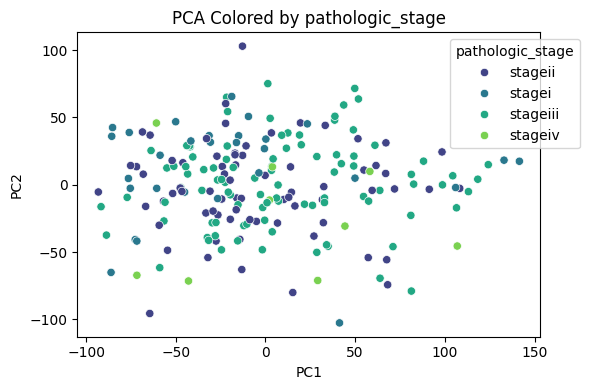

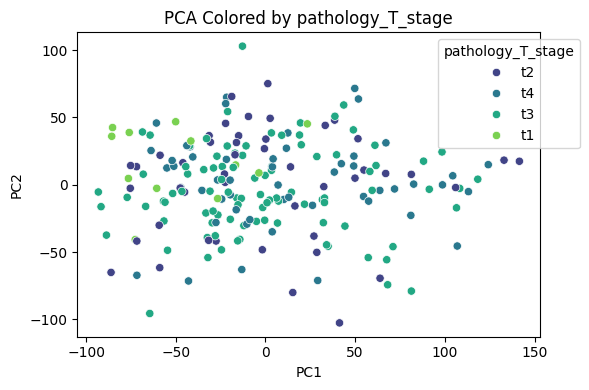

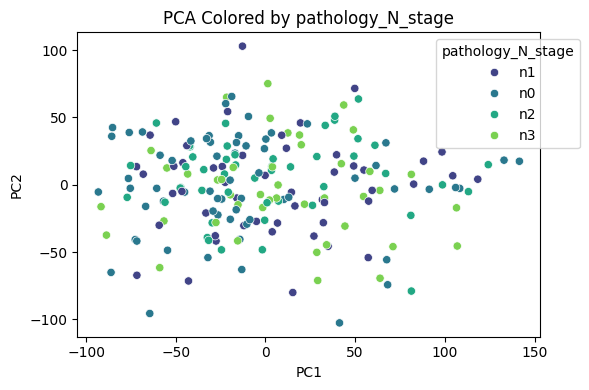

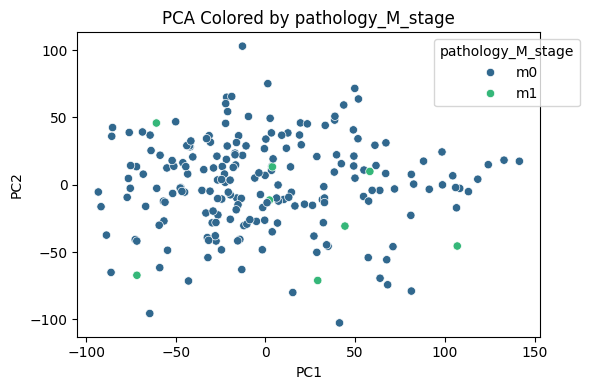

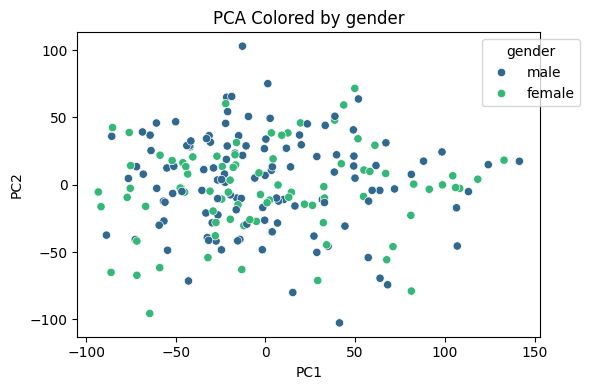

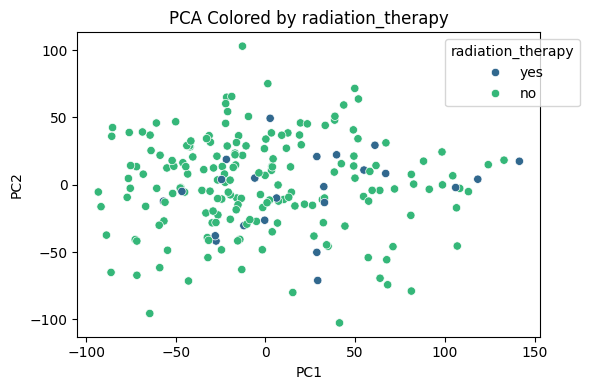

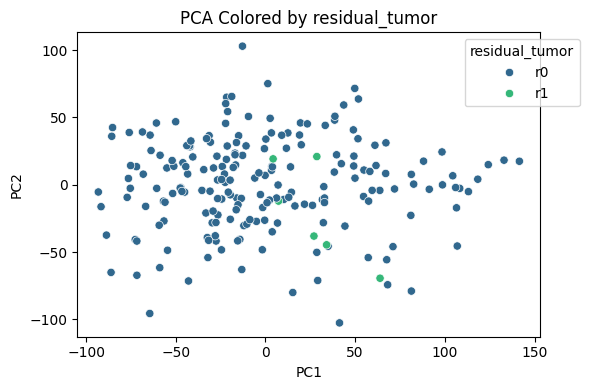

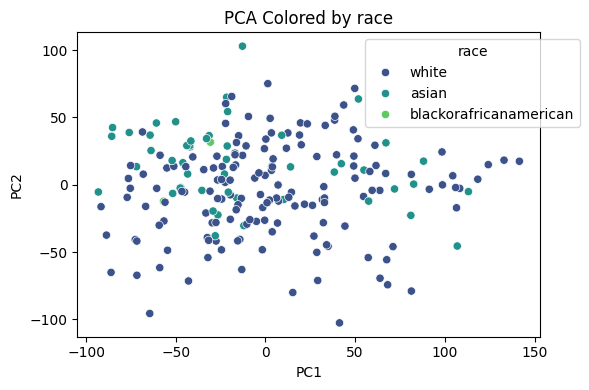

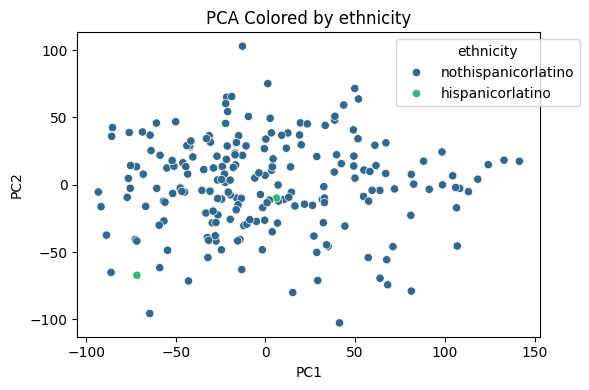

In [28]:
for var in clinical_vars:
  plt.figure(figsize = (6, 4))
  sns.scatterplot(data = pca_df,
                  x = 'PC1', y = 'PC2',
                  hue = var,
                  palette = 'viridis')
  plt.title(f'PCA Colored by {var}')
  plt.xlabel('PC1')
  plt.ylabel('PC2')
  plt.legend(title = var, bbox_to_anchor = (1.1, 1), loc = 'upper right')
  plt.tight_layout()
  plt.show()
  print('\n')

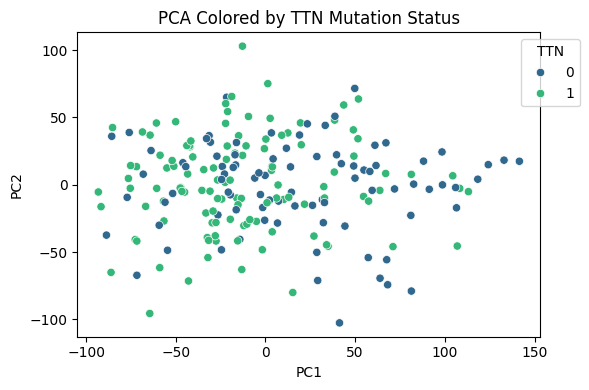

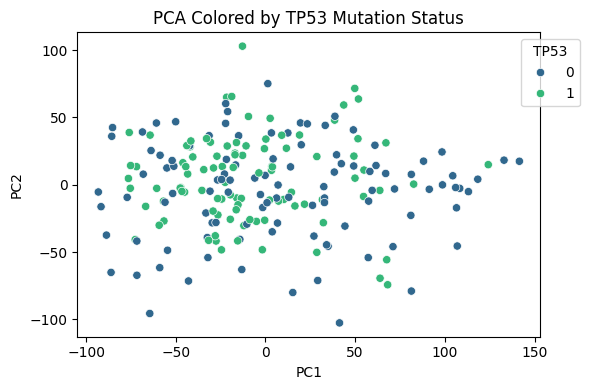

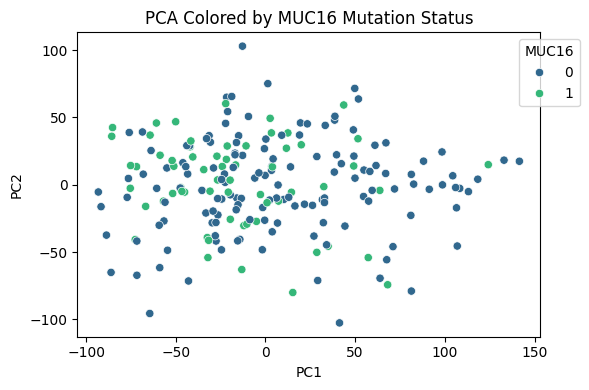

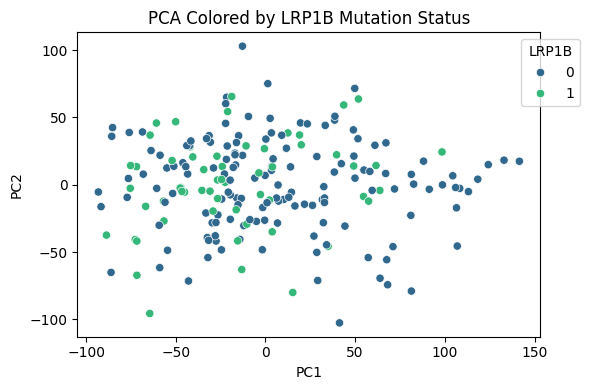

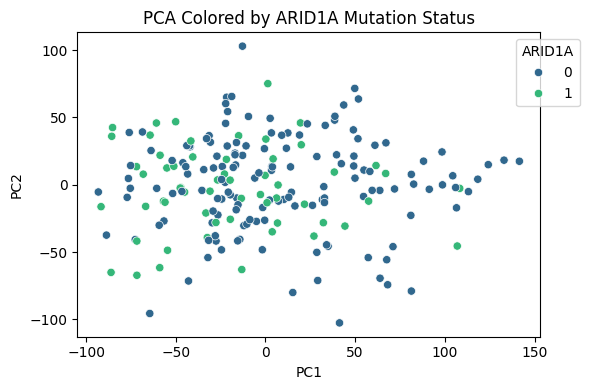

In [29]:
top_mut = mut_df.sum().sort_values(ascending = False).head(5)
top_mut

for gene in top_mut.index:
  status = mut_df[gene]

  plt.figure(figsize = (6, 4))
  sns.scatterplot(data = pca_df,
                  x = 'PC1', y = 'PC2',
                  hue = status,
                  palette = 'viridis')
  plt.title(f'PCA Colored by {gene} Mutation Status')
  plt.xlabel('PC1')
  plt.ylabel('PC2')
  plt.legend(title = gene, bbox_to_anchor = (1.1, 1), loc = 'upper right')
  plt.tight_layout()
  plt.show()
  print('\n')

#**TSNE**

In [30]:
tsne = TSNE(n_components = 2, perplexity = 20, random_state = 42)
tsne_result = tsne.fit_transform(pca_df[['PC1', 'PC2']])
tsne_df = pd.DataFrame(tsne_result,
                       columns = ['TSNE1', 'TSNE2'],
                       index = pca_df.index)

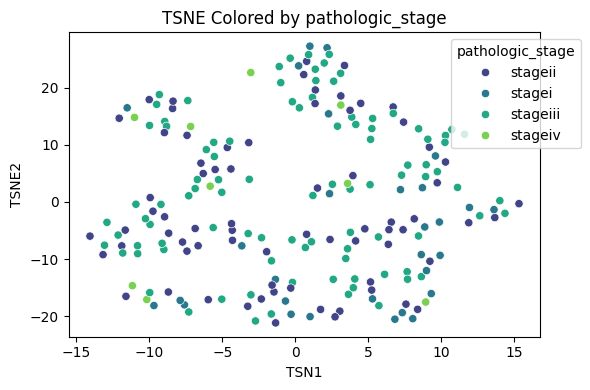

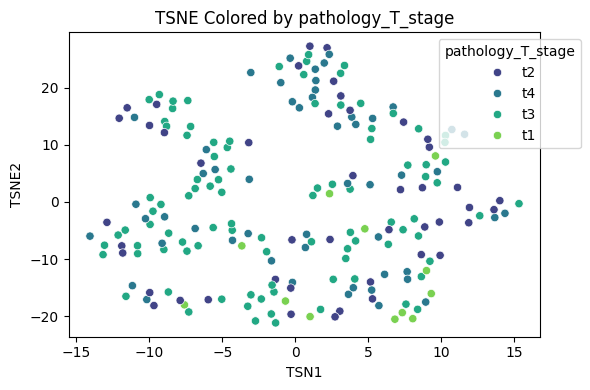

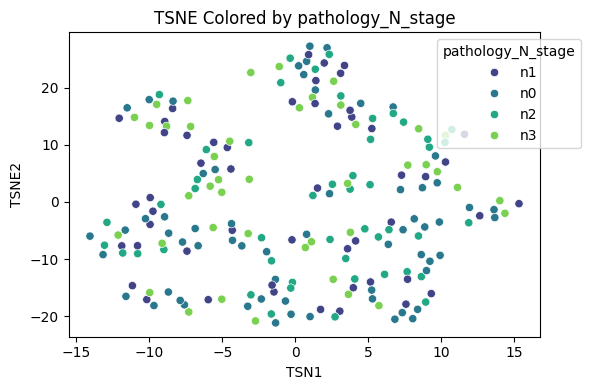

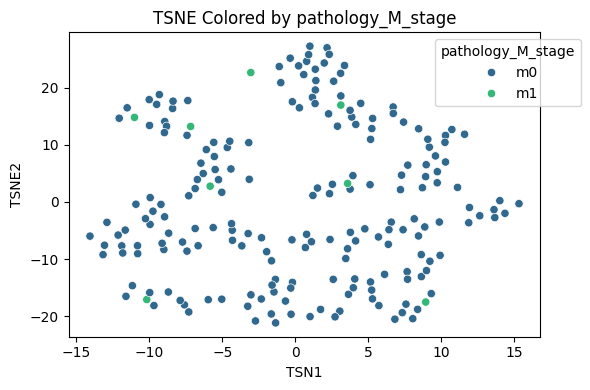

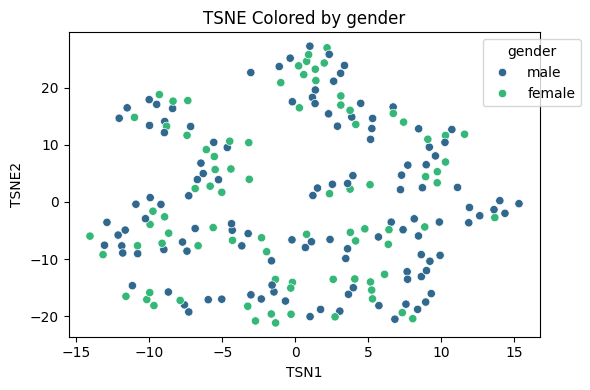

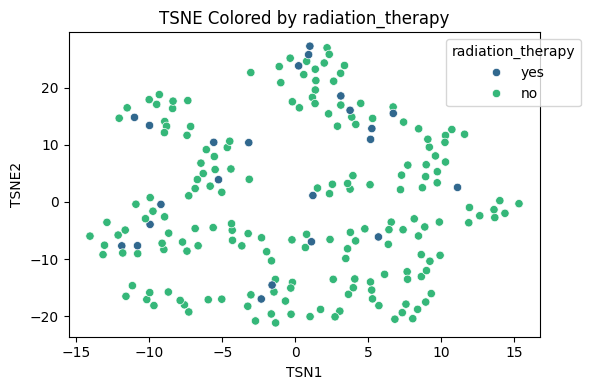

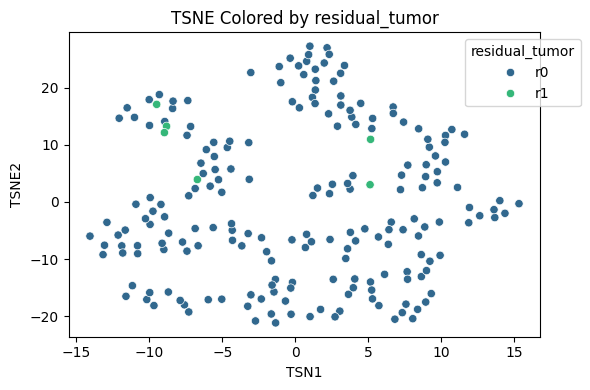

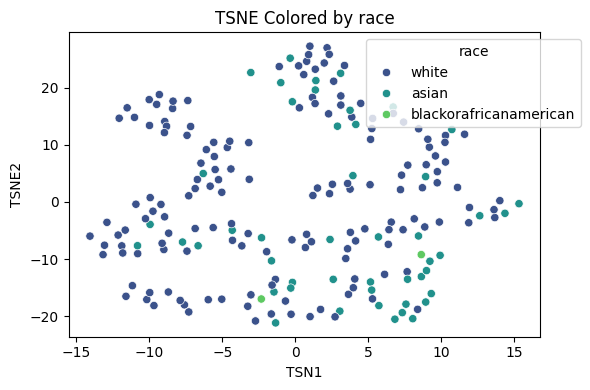

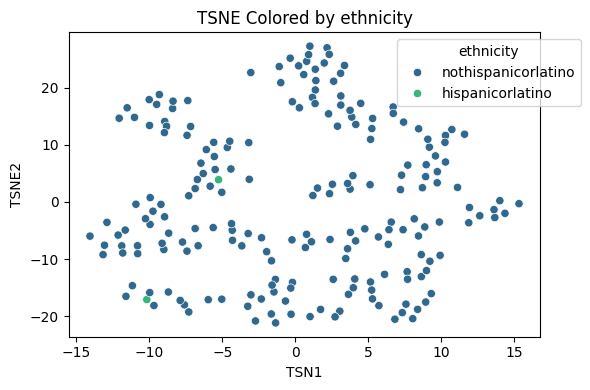

In [31]:
tsne_df = pd.concat([tsne_df, pca_df[clinical_vars]], axis = 1)

for var in clinical_vars:
  plt.figure(figsize = (6, 4))
  sns.scatterplot(data = tsne_df,
                  x = tsne_df['TSNE1'], y = tsne_df['TSNE2'],
                  hue = var,
                  palette = 'viridis')
  plt.title(f'TSNE Colored by {var}')
  plt.xlabel('TSN1')
  plt.ylabel('TSNE2')
  plt.legend(title = var, bbox_to_anchor = (1.1, 1), loc = 'upper right')
  plt.tight_layout()
  plt.show()
  print('\n')

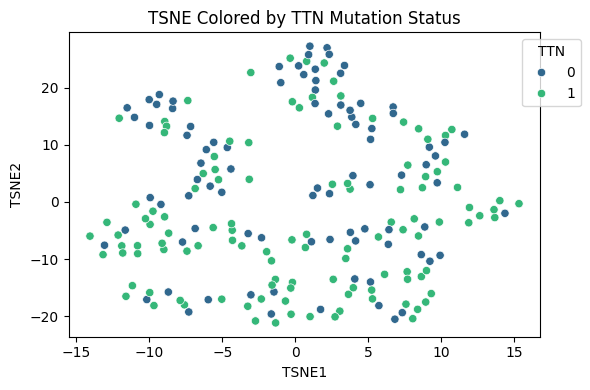

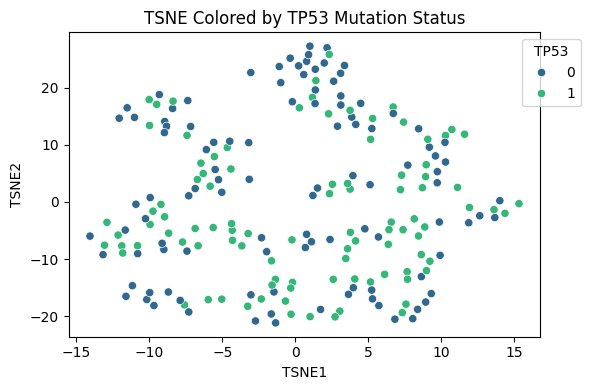

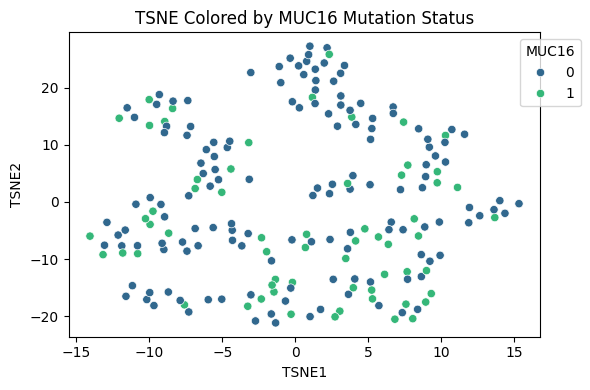

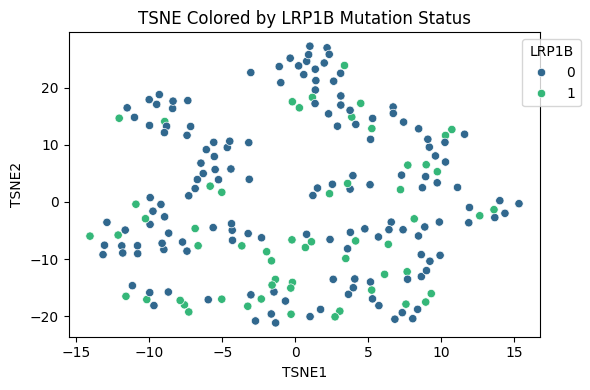

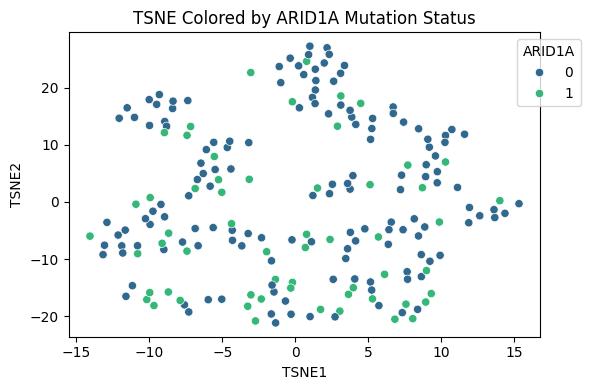

In [32]:
for gene in top_mut.index:
  status = mut_df.loc[tsne_df.index, gene]

  plt.figure(figsize = (6, 4))
  sns.scatterplot(x = tsne_df['TSNE1'], y = tsne_df['TSNE2'], hue = status, palette = 'viridis')
  plt.title(f'TSNE Colored by {gene} Mutation Status')
  plt.xlabel('TSNE1')
  plt.ylabel('TSNE2')
  plt.legend(title = gene, bbox_to_anchor = (1.1, 1), loc = 'upper right')
  plt.tight_layout()
  plt.show()
  print('\n')

#**UMAP**

In [41]:
umap = umap.UMAP(n_components = 2, random_state = 42)
umap_result = umap.fit_transform(pca_df[['PC1', 'PC2']])
umap_df = pd.DataFrame(umap_result,
                       columns = ['UMAP1', 'UMAP2'],
                       index = pca_df.index)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


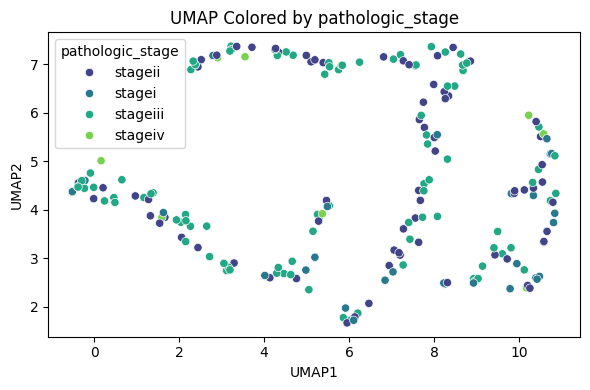

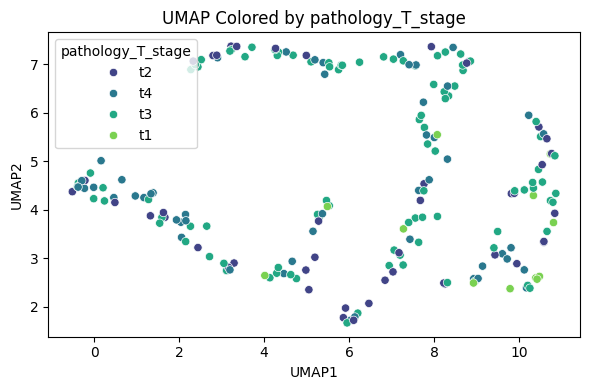

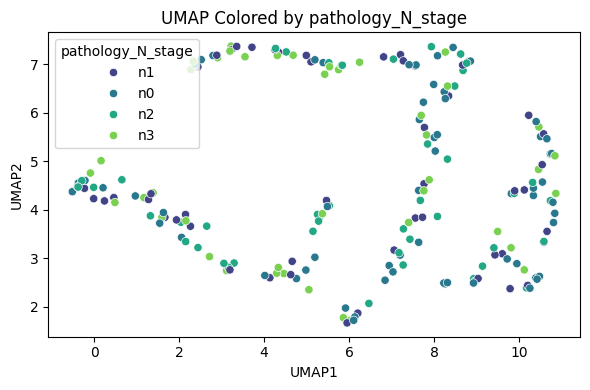

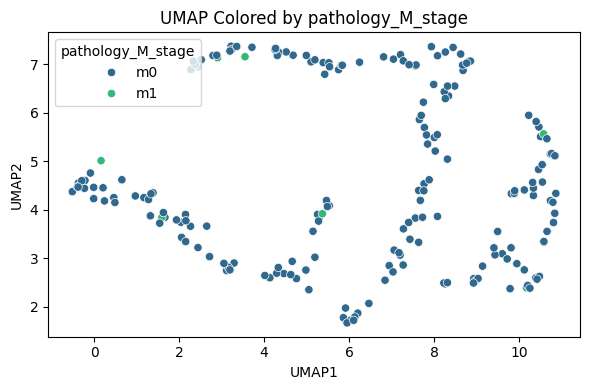

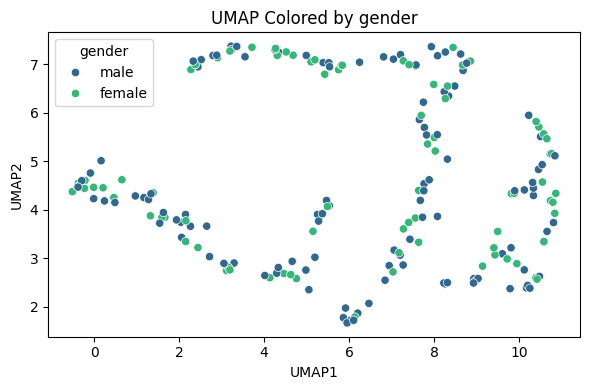

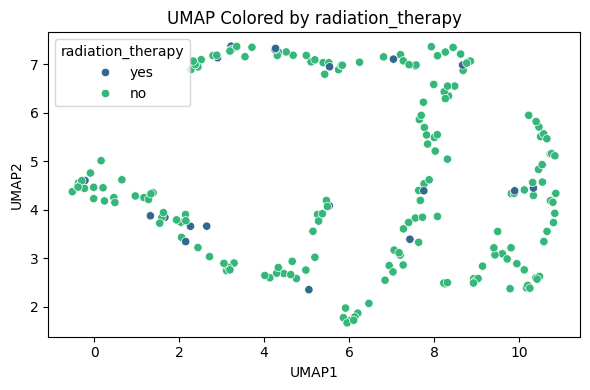

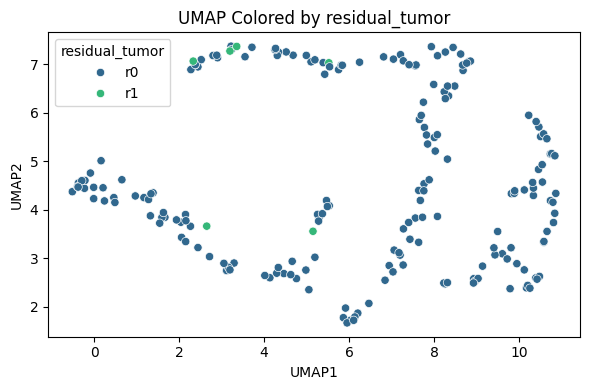

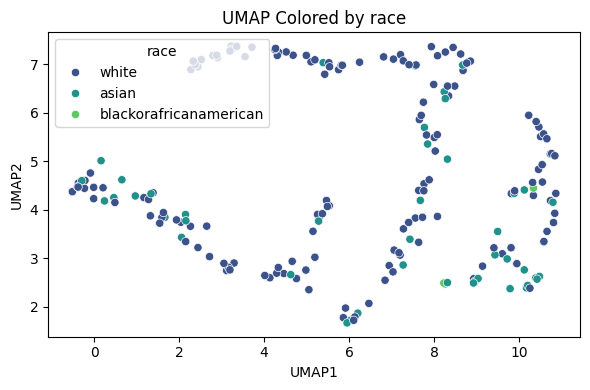

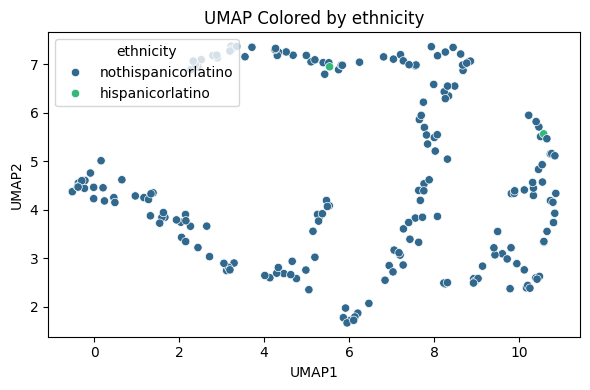

In [42]:
umap_df = pd.concat([umap_df[['UMAP1', 'UMAP2']], pca_df[clinical_vars]], axis = 1)

for var in clinical_vars:
    plt.figure(figsize = (6, 4))
    sns.scatterplot(
        x = umap_df['UMAP1'],
        y = umap_df['UMAP2'],
        hue = umap_df[var],
        palette ='viridis'
    )

    plt.title(f'UMAP Colored by {var}')
    plt.xlabel('UMAP1')
    plt.ylabel('UMAP2')
    plt.legend(title = var, loc = 'upper left')
    plt.tight_layout()
    plt.show()
    print('\n')

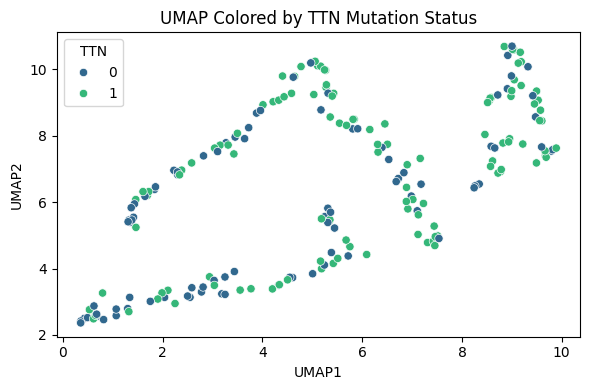

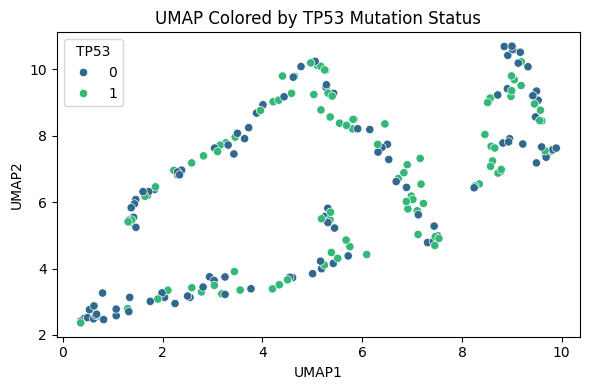

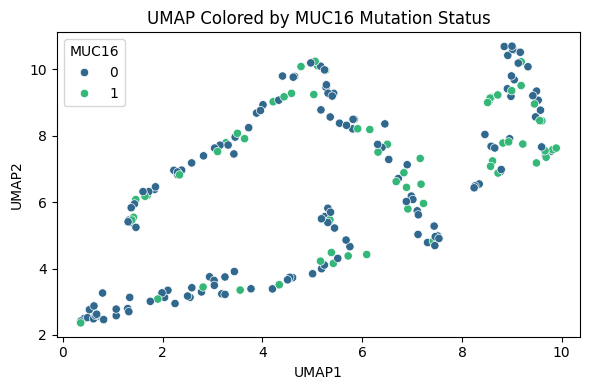

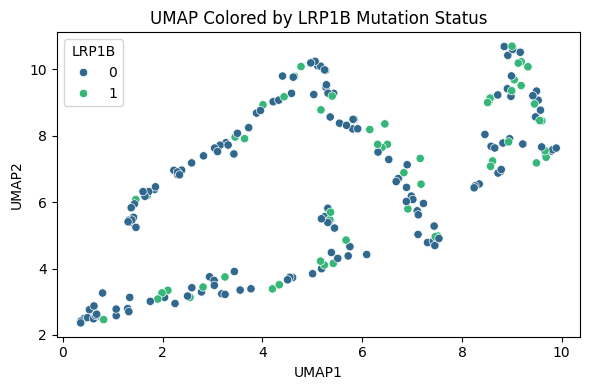

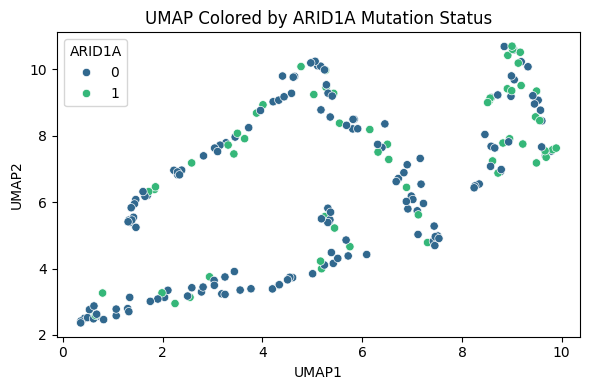

In [37]:
for gene in top_mut.index:
  status = mut_df.loc[umap_df.index, gene]

  plt.figure(figsize = (6, 4))
  sns.scatterplot(x = umap_df['UMAP1'], y = umap_df['UMAP2'], hue = status, palette = 'viridis')
  plt.title(f'UMAP Colored by {gene} Mutation Status')
  plt.xlabel('UMAP1')
  plt.ylabel('UMAP2')
  plt.legend(title = gene, loc = 'upper left')
  plt.tight_layout()
  plt.show()
  print('\n')

#**No Outliers... Last Check**
using IsolationForest!
[**Source**](https://medium.com/@y.s.yoon/isolation-forest-anomaly-detection-identify-outliers-101123a9ff63)

In [41]:
from sklearn.ensemble import IsolationForest

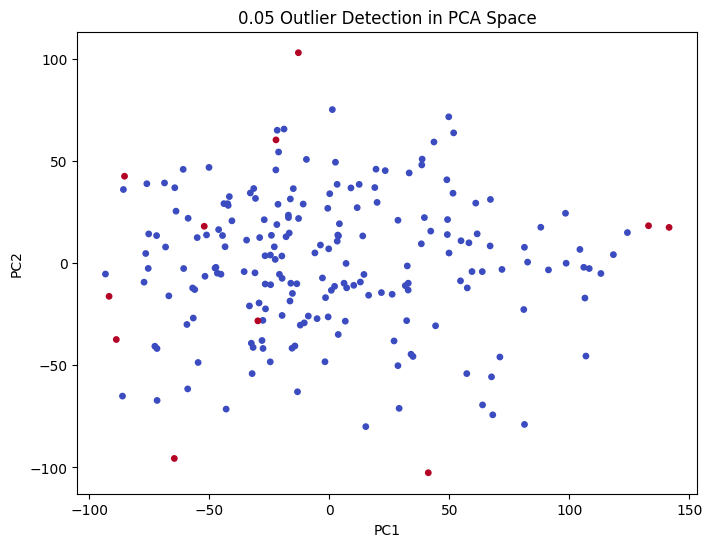

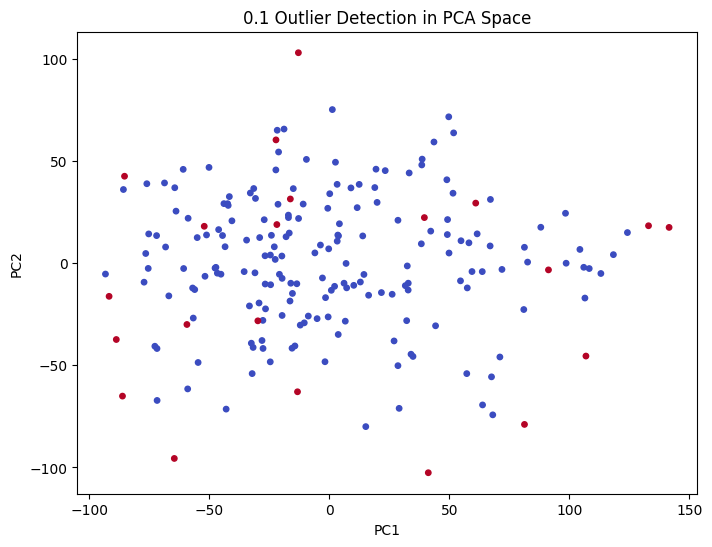

In [47]:
# model initialization & application
contamination = [0.05, 0.1]
for c in contamination:
  clf = IsolationForest(contamination = c, random_state = 42)
    # 5% of data = outliers
  outlier_pred = clf.fit_predict(rna_pca)

  # visualizing outliers
  plt.figure(figsize = (8, 6))
  plt.scatter(rna_pca[:, 0], rna_pca[:, 1], c = (outlier_pred == -1), cmap = 'coolwarm', s = 15)
  plt.title(f'{c} Outlier Detection in PCA Space')
  plt.xlabel('PC1')
  plt.ylabel('PC2')
  plt.show()
  print('\n')

#**Last Step...**
Downoad CSV files for the MOFA object & model creation

In [49]:
rna_csv = rna_df.to_csv('rna_csv.csv')
mut_csv = mut_df.to_csv('mut_csv.csv')
clin_csv = clin_df.to_csv('clin_csv.csv')

#**Outlier Detection Conclusion**
no obvious outliers - **verdict: we remove nothing!**

#**3 - MOFA**
The following section will be divided across 2 notebooks:
1. **Nadeen_Ali_Bioinfo_MOFA_Object.ipynb** - creation of MOFA object for model dimensions & pkl file
2. **Nadeen_Ali_Bioinfo_Data_Integration.ipynb** - integration of data & downstream analysis for biological data insight